In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select which features/columns to include in ML Model feature set
# Select which "derived" features to include in ML Model feature set

# Select crypto assets interested in evaluating
INCLUDE_BTEC = True
INCLUDE_ETH = False
INCLUDE_ADA = False

# Select the orderbook timeframe's interested in
INCLUDE_5MIN_DATA = True
INCLUDE_1MIN_DATA = False
INCLUDE_1SEC_DATA = False

NUM_ORDER_BOOK_LEVELS = 15

In [3]:
TURN_ON_PRINT_DEBUG = True

In [4]:
# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_columns', 200)

### Import the DERIVED Crytpo Order Book Data

In [5]:
# dictionary to store crypto dataframes {BTEC, ETH, ADA}, {5min, 1min, 1sec}
crypto_ob_df_dict = {} 

# Based on the selection critero, read the csv crypto order book csv files into the dictrionary
if (INCLUDE_5MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_5min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1SEC_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )    

In [6]:
# Debug data checkpoint

if (TURN_ON_PRINT_DEBUG):
    display(crypto_ob_df_dict.keys())
    
    for crypto_ob_key in crypto_ob_df_dict: 
        print(f"\nDebug {crypto_ob_key} derived dataframe:")
        display(crypto_ob_df_dict[crypto_ob_key].shape)
        display(crypto_ob_df_dict[crypto_ob_key].head(n=5))

dict_keys(['crypto_BTC_5min'])


Debug crypto_BTC_5min derived dataframe:


(3367, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity

## Optimize the neural network model

In [7]:
# Create a list of activation functions that will permutate over
activation_function_lst = ["relu", "sigmoid", "exponential", "swish"]
#activation_function_lst = ["relu", "sigmoid"]  # Condensed list, takes too long to run
num_activation_functions = len(activation_function_lst)

In [8]:
# Setup neural network model permutation parameters

# Permuatate over different activation lists
strt_num_activation_functions_idx = 0
end_num_activation_functions_idx = num_activation_functions-1
inc_num_activation_functions_idx = 1

# Permuatate the # of hidden layers
strt_num_hidden_layers = 1
end_hidden_layers = 3   # (this application supports up to 3 hidden layers, takes to long to run, so condensed it to 2 - no significant improvement seen with 3 anyways)
inc_hidden_layers = 1

# Permuatate the # of nodes in hidden layer 1
strt_num_hidden_nodes_layer1 = 50
end_num_hidden_nodes_layer1 = 100
inc_num_hidden_nodes_layer1 = 25

# Permuatate the # of nodes in hidden layer 2
strt_num_hidden_nodes_layer2 = 25
end_num_hidden_nodes_layer2 = 50
inc_num_hidden_nodes_layer2 = 25

# Permuatate the # of nodes in hidden layer 3
strt_num_hidden_nodes_layer3 = 5
end_num_hidden_nodes_layer3 = 10
inc_num_hidden_nodes_layer3 = 5

# Permuatate the # of epochs
strt_num_epochs = 50
end_num_epochs = 100
inc_num_epochs = 50

In [9]:
num_hidden_layers = strt_num_hidden_layers
num_activation_functions_idx = strt_num_activation_functions_idx
num_hidden_nodes_layer1 = strt_num_hidden_nodes_layer1
num_hidden_nodes_layer2 = strt_num_hidden_nodes_layer2
num_hidden_nodes_layer3 = strt_num_hidden_nodes_layer3
num_epochs = strt_num_epochs

# Create empty lists which will store the model parameters for each permutation run
num_activation_functions_idx_lst = []
num_hidden_layers_lst = []
num_hidden_nodes_layer1_lst = []
num_hidden_nodes_layer2_lst = []
num_hidden_nodes_layer3_lst = []
num_epochs_lst        = []

total_num_model_permutations = 0;
is_done_setting_up_model_permutations = False

# Loop through each of the permutations
while (not is_done_setting_up_model_permutations):

    # Make sure the # of nodes in subsequent hidden layers is always smaller than the current hidden layer
    if ((num_hidden_nodes_layer2 < num_hidden_nodes_layer1) and (num_hidden_nodes_layer3 < num_hidden_nodes_layer2)):
        
        # Add to the list the current permuation model parameters
        num_activation_functions_idx_lst.append(num_activation_functions_idx)
        num_hidden_layers_lst.append(num_hidden_layers)
        num_hidden_nodes_layer1_lst.append(num_hidden_nodes_layer1)
        num_hidden_nodes_layer2_lst.append(num_hidden_nodes_layer2)
        num_hidden_nodes_layer3_lst.append(num_hidden_nodes_layer3)
        num_epochs_lst.append(num_epochs)

        # Optional debug printing of values
        if (TURN_ON_PRINT_DEBUG):
            print(f"Setting Up Model Permuation #{total_num_model_permutations+1}")
            print(f"\t Use Model Activation Function = {activation_function_lst[num_activation_functions_idx]}")                
            print(f"\t# Hidden Layers = {num_hidden_layers}")
            print(f"\t\t# Hidden Layer 1 Nodes = {num_hidden_nodes_layer1}")
            if (num_hidden_layers > 1):
                print(f"\t\t# Hidden Layer 2 Nodes = {num_hidden_nodes_layer2}")
            if (num_hidden_layers > 2):
                print(f"\t\t# Hidden Layer 3 Nodes = {num_hidden_nodes_layer3}")
            print(f"\t# Epochs = {num_epochs}")

        # Increment the total number of runs/permuataions variable
        total_num_model_permutations = total_num_model_permutations + 1  
    
    # Scan through the different permuations values,
    #    if did not reach its end/final value, increment by the defined "increment" value
    #    else reset the value to its starting value, and move on to the next permuation parameter
    # Permutation order:
    #    # of epochs
    #    # of nodes in hidden layer 3 (if # of hidden layers has 3 layers)
    #    # of nodes in hidden layer 2 (if # of hidden layers has 2 layers)
    #    # of nodes in hidden layer 1 (there will always be a hidden layer 1))
    #    # of hidden layers
    
    if (num_epochs < end_num_epochs): 
        num_epochs = num_epochs + inc_num_epochs 
    else:
        num_epochs = strt_num_epochs
        
        if ((num_hidden_layers > 2) and (num_hidden_nodes_layer3 < end_num_hidden_nodes_layer3)): 
            num_hidden_nodes_layer3 = num_hidden_nodes_layer3 + inc_num_hidden_nodes_layer3
        else:
            num_hidden_nodes_layer3 = strt_num_hidden_nodes_layer3

            if ((num_hidden_layers > 1) and (num_hidden_nodes_layer2 < end_num_hidden_nodes_layer2)): 
                num_hidden_nodes_layer2 = num_hidden_nodes_layer2 + inc_num_hidden_nodes_layer2
            else:
                num_hidden_nodes_layer2 = strt_num_hidden_nodes_layer2

                if (num_hidden_nodes_layer1 < end_num_hidden_nodes_layer1): 
                    num_hidden_nodes_layer1 = num_hidden_nodes_layer1 + inc_num_hidden_nodes_layer1
                else:
                    num_hidden_nodes_layer1 = strt_num_hidden_nodes_layer1

                    if (num_hidden_layers < end_hidden_layers): 
                        num_hidden_layers = num_hidden_layers + inc_hidden_layers
                    else:
                        num_hidden_layers = strt_num_hidden_layers

                        if (num_activation_functions_idx < end_num_activation_functions_idx): 
                            num_activation_functions_idx = num_activation_functions_idx + inc_num_activation_functions_idx
                        else:
                            is_done_setting_up_model_permutations = True                                                   

Setting Up Model Permuation #1
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 50
	# Epochs = 50
Setting Up Model Permuation #2
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 50
	# Epochs = 100
Setting Up Model Permuation #3
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 75
	# Epochs = 50
Setting Up Model Permuation #4
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 75
	# Epochs = 100
Setting Up Model Permuation #5
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 100
	# Epochs = 50
Setting Up Model Permuation #6
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 100
	# Epochs = 100
Setting Up Model Permuation #7
	 Use Model Activation Function = relu
	# Hidden Layers = 2
		# Hidden Layer 1 Nodes = 50
		# Hidden Layer 2 Nodes = 25
	# Epochs = 50
Setting Up Mo

In [10]:
for crypto_ob_key in crypto_ob_df_dict:

    # Select which crypto order book data file to analyze
    crypto_sel_df = crypto_ob_df_dict[crypto_ob_key]
    print(f"\n\n\n\nEvaluating Crypto DataFrame: {crypto_ob_key}")
    
    # Find the location of the "midpoint" column, and initialize the "Signal" to 0 (to be placed next the midpotint column entry)
    midpoint_column_index = crypto_ob_df_dict[crypto_ob_key].columns.get_loc("midpoint")
    if 'Signal' in crypto_sel_df.columns:
        crypto_sel_df["Signal"] = 0.0
    else:
        crypto_sel_df.insert(midpoint_column_index+1, "Signal", 0.0)        
    
    # If the buys_sells_imbalance increases, set Signal to +1, else if it decreases, set to 0
    crypto_sel_df.loc[(crypto_sel_df['buys_sells_imbalance'].shift(-1) >= crypto_sel_df['buys_sells_imbalance']), 'Signal'] = 1
    crypto_sel_df.loc[(crypto_sel_df['buys_sells_imbalance'].shift(-1) < crypto_sel_df['buys_sells_imbalance']), 'Signal'] = 0

    # drop the last row (don't know if the next row midpoint went up or down)
    crypto_sel_df.drop(index=crypto_sel_df.index[-1],axis=0,inplace=True)
    
    # Separate the data into labels and features
    
    # Separate the y variable, the labels
    y_srs = crypto_sel_df['Signal']
    
    # Separate the X variable, the features
    X_df = crypto_sel_df.drop(columns='Signal')
    
    # Split the data using 
    train_index = int(X_df.shape[0] * 0.75) - 1
    X_train_df = X_df.iloc[:train_index]
    y_train_srs = y_srs.iloc[:train_index]
    X_test_df = X_df.iloc[train_index:]
    y_test_srs = y_srs.iloc[train_index:]
    #X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)
    
    # Create a StandardScaler instance
    standard_scaler_inst = StandardScaler()
    
    # Fit the scaler to the features training dataset
    X_train_scaler = standard_scaler_inst.fit(X_train_df)
    
    # Fit the scaler to the features training dataset
    X_train_scaled_npa = X_train_scaler.transform(X_train_df)
    X_test_scaled_npa = X_train_scaler.transform(X_test_df)    

    # Convert back to dataframe (to make it easier to drop feature sets as part of evaluating different model permuations below)
    X_train_scaled_df = pd.DataFrame(X_train_scaled_npa, columns = X_df.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled_npa, columns = X_df.columns)

    # Run the neural network through all the permutations
    
    model_verbose = False
    
    # create an empty array that will hold the neural network model for each permuation
    nn_sequential_permutation_model_npa = np.empty(total_num_model_permutations,  dtype=np.object)
    
    # Keep track of model permutation with best results
    best_permutation_num = 0
    best_loss_value = 0
    best_accuracy_value = 0
    
    # Create an initial empty list containter to hold the fit model history and permuation/losses
    nn_sequential_permutation_model_fit_lst = []
    nn_sequential_permutation_model_loss_lst = []
    nn_sequential_permutation_model_accuracy_lst = []
    
    for x in range(total_num_model_permutations):
        
        # Define the the number of inputs (features) to the model
        number_input_features = X_train_scaled_df.shape[1]
        number_output_neurons = 1
    
        if (TURN_ON_PRINT_DEBUG):
            print(f"Running Permuation #{x+1}") 
            print(f"\t# Input Features = {number_input_features}")
            print(f"\t Use Model Activation Function = {activation_function_lst[num_activation_functions_idx_lst[x]]}")                
            print(f"\t# Hidden Layers = {num_hidden_layers_lst[x]}")
            print(f"\t# Layer 1 Nodes = {num_hidden_nodes_layer1_lst[x]}")
            if (num_hidden_layers_lst[x] > 1):
                print(f"\t# Layer 2 Nodes = {num_hidden_nodes_layer2_lst[x]}")
            if (num_hidden_layers_lst[x] > 2):
                print(f"\t# Layer 3 Nodes = {num_hidden_nodes_layer3_lst[x]}")
            print(f"\t# of Output Nuerons = {number_output_neurons}")
            print(f"\t# Epochs = {num_epochs_lst[x]}")
        
        # Create the Sequential model instance
        nn_sequential_permutation_model_npa[x] = Sequential()
    
        # Add the first hidden layer
        nn_sequential_permutation_model_npa[x].add(Dense(units=num_hidden_nodes_layer1_lst[x], activation=activation_function_lst[num_activation_functions_idx_lst[x]], input_dim=number_input_features))
    
        # If exist in this model permutation, add the second hidden layer
        if (num_hidden_layers_lst[x] > 1):
            nn_sequential_permutation_model_npa[x].add(Dense(units=num_hidden_nodes_layer2_lst[x], activation=activation_function_lst[num_activation_functions_idx_lst[x]]))
    
        # If exist in this model permutation, add the third hidden layer
        if (num_hidden_layers_lst[x] > 2):
            nn_sequential_permutation_model_npa[x].add(Dense(units=num_hidden_nodes_layer3_lst[x], activation=activation_function_lst[num_activation_functions_idx_lst[x]]))         
    
        # Add the output layer to the model specifying the number of output neurons and activation function
        nn_sequential_permutation_model_npa[x].add(Dense(units=number_output_neurons, activation=activation_function_lst[num_activation_functions_idx_lst[x]]))
    
        # Display the Sequential model summary
        #nn_sequential_permutation_model_npa[x].summary()
    
        # Compile the Sequential model
        nn_sequential_permutation_model_npa[x].compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
        
        # Fit the model and the training data
        nn_sequential_original_model_fit = nn_sequential_permutation_model_npa[x].fit(X_train_scaled_df, y_train_srs, epochs=num_epochs_lst[x], verbose=model_verbose) 
    
        # Evaluate the model loss and accuracy metrics using the evaluate method and the test data
        nn_sequential_permutation_model_loss, nn_sequential_permutation_model_accuracy =  nn_sequential_permutation_model_npa[x].evaluate(X_test_scaled_df,y_test_srs,verbose=0)
    
        # If this model permutation provided the best results, update "best" value set
        # (Finding best accuracy)
        if (nn_sequential_permutation_model_accuracy > best_accuracy_value):
            best_permutation_num = x
            best_loss_value = nn_sequential_permutation_model_loss
            best_accuracy_value = nn_sequential_permutation_model_accuracy
        
        # Display the model loss and accuracy results
        if (TURN_ON_PRINT_DEBUG):
            #print(f"\t\t\t***                       Permutation:{x+1} ==> Loss: {nn_sequential_permutation_model_loss}, Accuracy: {nn_sequential_permutation_model_accuracy} ***") 
            #print(f"\t\t\t*** Best Running Results: Permutation:{best_permutation_num+1} ==> Loss: {best_loss_value}, Accuracy: {best_accuracy_value} ***")                 
            print(f"\t\t\t***                       Permutation:{x+1} ==> Accuracy: {nn_sequential_permutation_model_accuracy} ***") 
            print(f"\t\t\t*** Best Running Results: Permutation:{best_permutation_num+1} ==> Accuracy: {best_accuracy_value} ***")                 
    
        nn_sequential_permutation_model_fit_lst.append(nn_sequential_original_model_fit)
        nn_sequential_permutation_model_loss_lst.append(nn_sequential_permutation_model_loss)
        nn_sequential_permutation_model_accuracy_lst.append(nn_sequential_permutation_model_accuracy)
            
    #print(f"\n\n*** Final Best Results: Permutation:{best_permutation_num+1} ==> Loss: {best_loss_value}, Accuracy: {best_accuracy_value} ***")          
    print(f"\n\n*** Final Best Results: Permutation:{best_permutation_num+1} ==> Accuracy: {best_accuracy_value} ***")                  





Evaluating Crypto DataFrame: crypto_BTC_5min
Running Permuation #1
	# Input Features = 200
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 50
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:1 ==> Accuracy: 0.5943060517311096 ***
			*** Best Running Results: Permutation:1 ==> Accuracy: 0.5943060517311096 ***
Running Permuation #2
	# Input Features = 200
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 50
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:2 ==> Accuracy: 0.6583629846572876 ***
			*** Best Running Results: Permutation:2 ==> Accuracy: 0.6583629846572876 ***
Running Permuation #3
	# Input Features = 200
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 75
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:3 ==> Accuracy: 0.6120996475219727 ***
			*** Best Running Results: Permutation:2 ==>

### Display the accuracy scores achieved by each model, and compare the results.




*** Original Neural Network Results: ==> Accuracy: 0.6631079316139221 ***



<AxesSubplot:title={'center':'History Of Original Neural Network Model: Accuracy'}, xlabel='# Epoch', ylabel='Accuracy'>

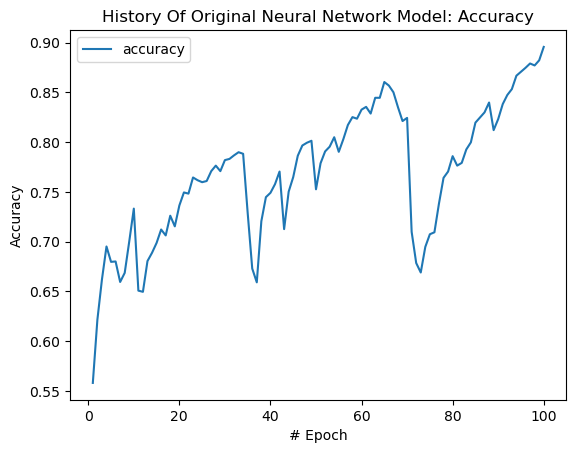

In [11]:
# Plot the loss/accuracy of the original neural network model results
model_plot = pd.DataFrame(
    nn_sequential_original_model_fit.history, 
    index=range(1, len(nn_sequential_original_model_fit.history["loss"]) + 1)
)

# Display the model loss and accuracy results

print()
#print(f"\n\n*** Original Neural Network Results: ==> Loss: {nn_sequential_permutation_model_loss}, Accuracy: {nn_sequential_permutation_model_accuracy} ***")      
print(f"\n\n*** Original Neural Network Results: ==> Accuracy: {nn_sequential_permutation_model_accuracy} ***")      
print()

# Vizualize the model plot where the y-axis displays the loss metric
#model_plot.plot(y="loss", title="History Of Original Neural Network Model: Loss", xlabel="# Epoch", ylabel="Loss")

# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy", title="History Of Original Neural Network Model: Accuracy", xlabel="# Epoch", ylabel="Accuracy")




*** Final Best Results: Permutation:37 ==> Accuracy: 0.690391480922699 ***



<AxesSubplot:title={'center':'History Of The Best Neural Network Model: Accuracy'}, xlabel='# Epoch', ylabel='Accuracy'>

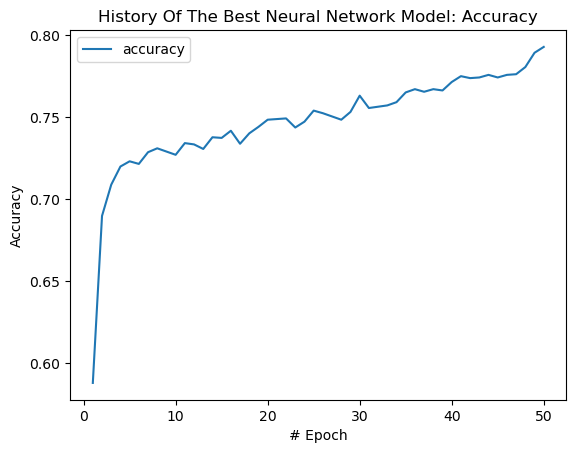

In [12]:
# Plot the loss/accuracy of the Best neural network model results that was obtained from all the different model permutation runs
model_plot = pd.DataFrame(
    nn_sequential_permutation_model_fit_lst[best_permutation_num].history, 
    index=range(1, len(nn_sequential_permutation_model_fit_lst[best_permutation_num].history["loss"]) + 1)
)

print()
#print(f"\n\n*** Final Best Results: Permutation:{best_permutation_num+1} ==> Loss: {best_loss_value}, Accuracy: {best_accuracy_value} ***")      
print(f"\n\n*** Final Best Results: Permutation:{best_permutation_num+1} ==> Accuracy: {best_accuracy_value} ***")      
print()

# Vizualize the model plot where the y-axis displays the loss metric
#model_plot.plot(y="loss", title="History Of The Best Neural Network Model: Loss", xlabel="# Epoch", ylabel="Loss")

# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy", title="History Of The Best Neural Network Model: Accuracy", xlabel="# Epoch", ylabel="Accuracy")

### Save each of your alternative models as an HDF5 file.


In [13]:
# Save the loss/accuracy of the Best neural network model results that was obtained from all the different model permutation runs
nn_sequential_best_model_json = nn_sequential_permutation_model_npa[best_permutation_num].to_json()

file_path = Path("./Resources/nn_sequential_best_model_json.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_sequential_best_model_json)    
    
# Save weights
file_path = Path("./Resources/nn_sequential_best_model_json.h5")
nn_sequential_permutation_model_npa[best_permutation_num].save_weights(file_path) 

27/27 [==============================] - 0s 537us/step


,midpoint,bids_price_0,asks_price_0,Actual_Returns,y_test_srs,Signal,seq_pred_npa,Seq_Signal
1,60949.955,60949.95,60949.96,0.001184,0.0,-1.0,0.056598,-1.0
2,60808.225,60808.22,60808.23,-0.002325,1.0,1.0,0.808708,1.0
3,60751.635,60751.63,60751.64,-0.000931,1.0,1.0,0.415434,-1.0
4,60884.485,60884.48,60884.49,0.002187,0.0,-1.0,0.041238,-1.0
5,60667.095,60667.09,60667.10,-0.003571,1.0,1.0,0.632228,1.0


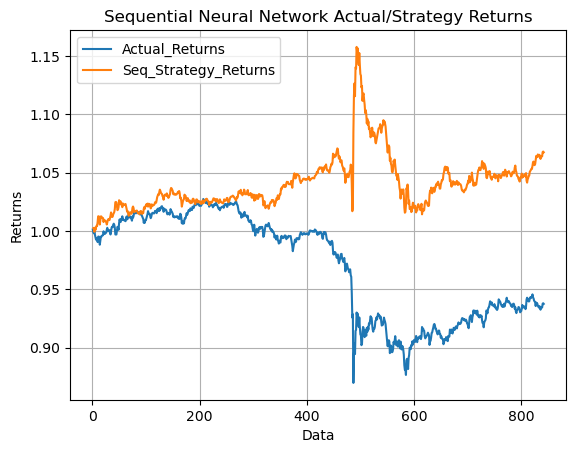

In [14]:
# Plot the cumulative returns from trasing strategies using machine learning

predictions_df = X_test_df[["midpoint", "bids_price_0", "asks_price_0"]]
predictions_df["Actual_Returns"] = (predictions_df["midpoint"] - predictions_df["midpoint"].shift(1)) / predictions_df["midpoint"].shift(1)

predictions_df["y_test_srs"] = y_test_srs
predictions_df.loc[(predictions_df["y_test_srs"] >= 0.5), 'Signal'] = +1
predictions_df.loc[(predictions_df["y_test_srs"] < 0.5), 'Signal'] = -1

seq_pred_npa = nn_sequential_permutation_model_npa[best_permutation_num].predict(X_test_scaled_df)
predictions_df["seq_pred_npa"] = seq_pred_npa
predictions_df.loc[(predictions_df["seq_pred_npa"] >= 0.5), 'Seq_Signal'] = +1
predictions_df.loc[(predictions_df["seq_pred_npa"] < 0.5), 'Seq_Signal'] = -1

predictions_df.reset_index(drop=True, inplace=True)

# Since shifted the signals down by 1 day, the first entry will be Nan, dropit
predictions_df.dropna(inplace=True)

display(predictions_df.head())

# Add the strategy returns to the DataFrame
# Shifting signal column ... 
#    deciding what the signal will be on day N
#    Buying/Selling stock the "next" day (day N+1)
#    Therefore, strategy returns are computed for next day (N+1)
predictions_df['Seq_Strategy_Returns'] = predictions_df['Actual_Returns'] * predictions_df['Seq_Signal'].shift(1)
(1 + predictions_df[['Actual_Returns', 'Seq_Strategy_Returns']]).cumprod().plot(title="Sequential Neural Network Actual/Strategy Returns", xlabel="Data", ylabel="Returns").grid()
